# 学習結果の描画

score は学習の際に用いた値  
fitness は一定区間毎にモデルの当てはまりをテストした値

In [1]:
!python3 -m pip install seaborn

In [2]:
import os
import dill
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!pwd

/Users/work/work-worldmodel2023/WorldModel2023/otk/AgileRL-MATD3/simple_spread_v3


In [4]:
# 保存済みの population を読み込み
path_pop = "./result/20240102-0837/pickle-population.pkl"

population = dill.load(open(path_pop,'rb'))

In [5]:
# population のなかに含まれる fitness を取り出す
fitnesses = [agent.fitness for agent in population]

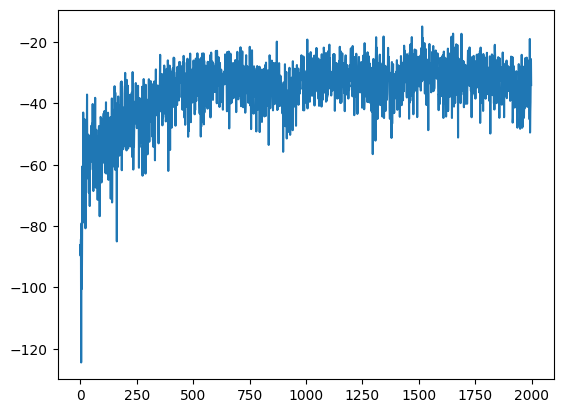

In [6]:
# fitnessを描画
plt.plot(fitnesses[0][0:-1])

In [7]:
print(fitnesses[0][0:20])

[-86.19429343139477, -89.65894990863119, -88.80876546618326, -84.30507567655246, -124.49690049276585, -79.1413272858386, -79.44719048551703, -100.47990119395256, -87.12834312361001, -60.67584031543576, -78.96378581088511, -60.39757535776831, -75.35113407007748, -42.99160881722941, -56.323223614345295, -64.15169633655785, -48.895883206593275, -52.41686416326976, -67.30737334079075, -45.18316420248302]


In [8]:
# Scoreを取り出す
scores = [agent.scores for agent in population]

print(scores[0][0:20])

[-26.2722999258306, -68.73984329698254, -33.52932763613343, -79.2277102766103, -83.17004469564755, -85.30967272601454, -76.88942443954568, -78.59142597755175, -53.6759343063636, -44.42657070795053, -52.73108838212086, -49.95075628650987, -94.23963857230332, -85.53608863202962, -109.83617416093804, -39.1617741034371, -111.9726447980195, -83.46034057112783, -43.21897207833125, -77.67354944198422]


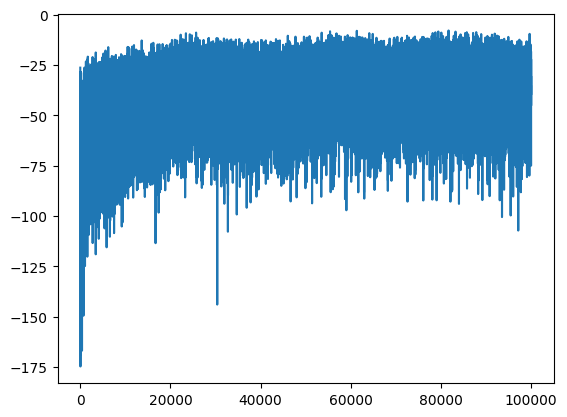

In [9]:
# Scoreを描画
plt.plot(scores[0][0:-1])

<Axes: >

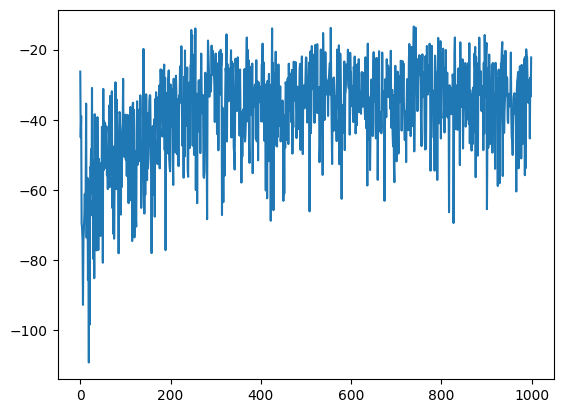

In [10]:
sns.lineplot(scores[0][0:-1:100], errorbar=('ci', 95))

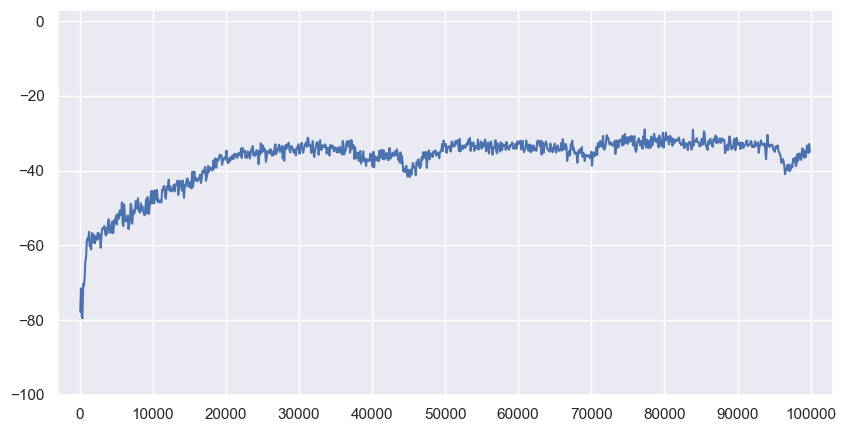

In [13]:
score = pd.DataFrame(scores[0][0:-1])
sns.set(rc={"figure.figsize": (10, 5)})

sns.lineplot(score.rolling(100, step=100).mean(), errorbar=('ci', 95), legend=False)

plt.xticks(np.arange(0, 103000, step=10000))
plt.xlim(-3000,103000)
plt.ylim(-100,3)

plt.savefig("score_simple_spread_v3.png")
plt.show()

In [12]:
score[1:101].mean()

0   -77.722945
dtype: float64